In [11]:
import paddle
print(paddle.__version__)

2.4.2


## 一、MNIST 数据集
> [MNIST handwritten digit database, Yann LeCun, Corinna Cortes and Chris Burges](http://yann.lecun.com/exdb/mnist/)

MNIST 是 NIST 的子集，其中包含有 60,000 个样本的训练集，以及有 10,000 个样本的测试集。
每个图像都是 28x28 的 256 阶灰度图。

加载 paddle 中的 MNIST 数据集

In [16]:
import itertools
import paddle

train_dataset = paddle.vision.datasets.MNIST(mode='train') # 60,000
test_dataset = paddle.vision.datasets.MNIST(mode='test')   # 10,000
print('train images: ',len(train_dataset),', test images: ',len(test_dataset))

train images:  60000 , test images:  10000


`itertools.islice(iterable, start, stop)` 接受一个可迭代对象和两个数字作为参数，会返回 `[start, stop)` 内的元素
下面花了数据集中的前 50 张图像及其标签

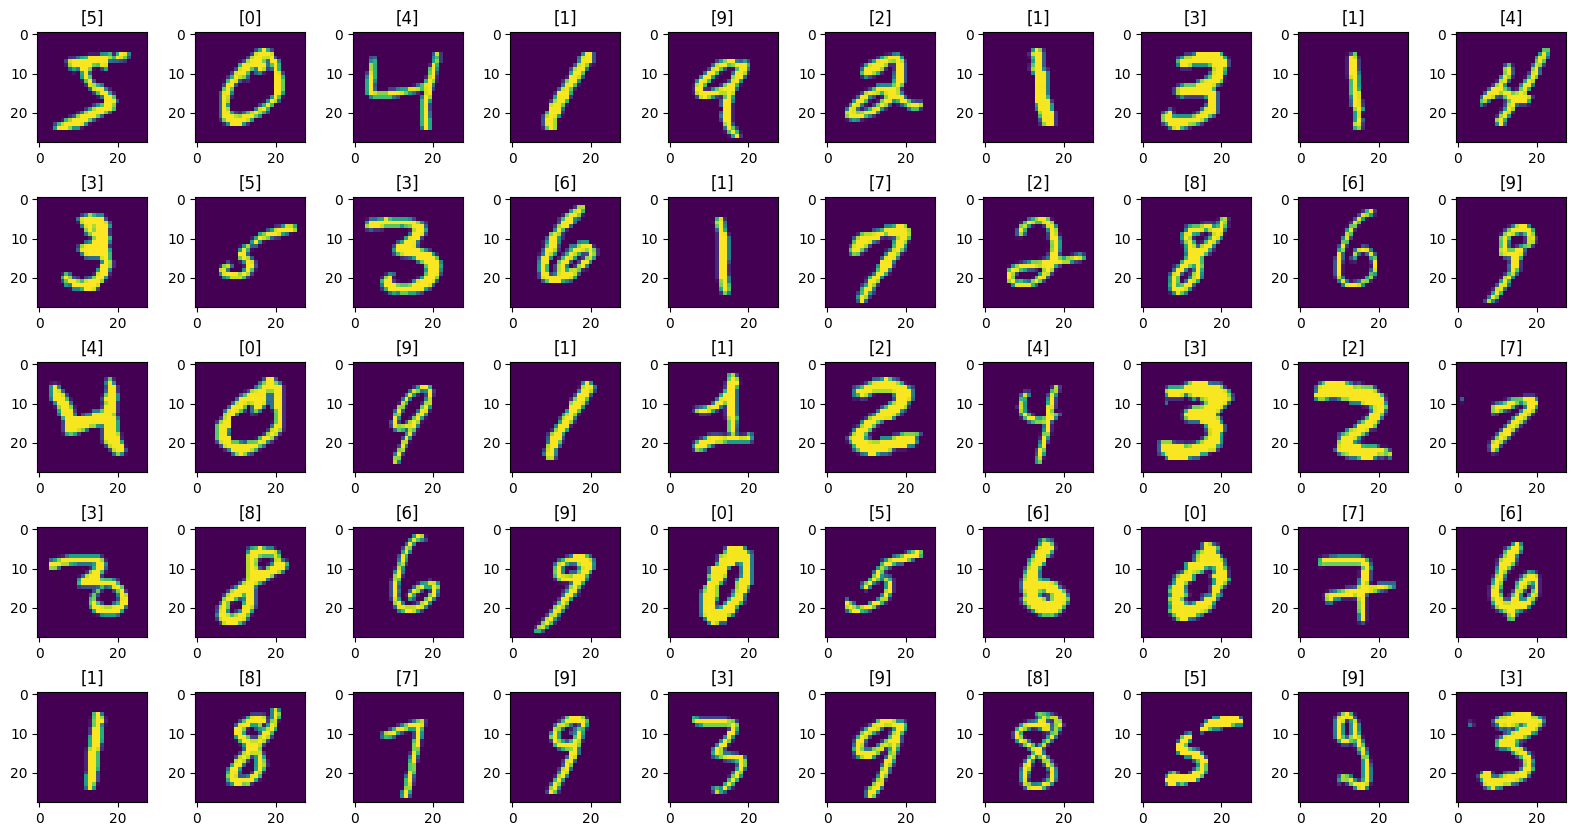

In [31]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 10))
for i, item in enumerate(itertools.islice(train_dataset, 0, 50)):
    # print(img, label)
    plt.subplot(5, 10, i+1)
    image, label= item
    plt.title(str(label))
    plt.imshow(image)

plt.subplots_adjust(hspace=0.5)
plt.show()


这里画出来背景是紫色字是黄色的原因是与 `plt.imshow` 使用的颜色映射有关的，详细见 https://blog.csdn.net/qq_28485501/article/details/82656614
本来每个像素是 `[0, 255]` 的灰度值，不过按照默认的 `viridis` 映射就成了紫色到黄色。
可以传入 `cmap=matplotlib.cm.gist_gray` 即可恢复正常

In [32]:
train_dataset[0][0]

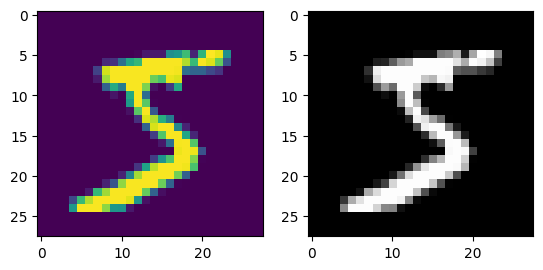

In [36]:
import matplotlib

plt.subplot(1, 2, 1)
plt.imshow(train_dataset[0][0])
plt.subplot(1, 2, 2)
plt.imshow(train_dataset[0][0], cmap=matplotlib.cm.gist_gray)

## 二、训练
简单试一下 LeNet

In [1]:
import paddle
import numpy as np
from paddle.vision.transforms import Normalize

transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
# 下载数据集并初始化 DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

# 模型组网并初始化网络
lenet = paddle.vision.models.LeNet(num_classes=10)
model = paddle.Model(lenet)

# 模
#
#
#
#
# 型训练的配置准备，准备损失函数，优化器和评价指标
# model.prepare(paddle.optimizer.Adam(parameters=model.parameters()),
#               paddle.nn.CrossEntropyLoss(),
#               paddle.metric.Accuracy())
def train_model():
    # 模型训练
    model.fit(train_dataset, epochs=100, batch_size=64, verbose=1)
    # 保存模型
    model.save('./output/LeNet-Adam-CrossEntropyLoss')

# train_model()
# 加载模型
model.load('output/LeNet-Adam-CrossEntropyLoss')

# 模型评估
model.evaluate(test_dataset, batch_size=64, verbose=1)

# 从测试集中取出一张图片
img, label = test_dataset[0]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print('true label: {}, pred label: {}'.format(label[0], pred_label))
# 可视化图片
from matplotlib import pyplot as plt
plt.imshow(img[0])


AttributeError: 'Model' object has no attribute '_place'

In [8]:

transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
# 下载数据集并初始化 DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

from models.LeNet import LeNet
# from paddle.vision.models import LeNet
lenet = LeNet()
paddle.summary(lenet,(1, 1, 28, 28))

model = paddle.Model(lenet)

model.prepare(
    paddle.optimizer.Adam(parameters=model.parameters()),
    paddle.nn.CrossEntropyLoss(),
    paddle.metric.Accuracy())
model.fit(train_dataset, epochs=1, batch_size=100)

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Conv2D-15      [[1, 1, 28, 28]]      [1, 6, 28, 28]          60       
    ReLU-15       [[1, 6, 28, 28]]      [1, 6, 28, 28]           0       
 MaxPool2D-15     [[1, 6, 28, 28]]      [1, 6, 14, 14]           0       
   Conv2D-16      [[1, 6, 14, 14]]     [1, 16, 10, 10]         2,416     
    ReLU-16      [[1, 16, 10, 10]]     [1, 16, 10, 10]           0       
 MaxPool2D-16    [[1, 16, 10, 10]]      [1, 16, 5, 5]            0       
   Linear-22          [[400]]               [120]             48,120     
   Linear-23          [[120]]                [84]             10,164     
   Linear-24           [[84]]                [10]               850      
Total params: 61,610
Trainable params: 61,610
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.00
Forward/backward

ValueError: (InvalidArgument) Input(Y) has error dim.Y'dims[0] must be equal to 40000But received Y'dims[0] is 400
  [Hint: Expected y_dims[y_ndim - 2] == N, but received y_dims[y_ndim - 2]:400 != N:40000.] (at ..\paddle/phi/kernels/impl/matmul_kernel_impl.h:157)
  [operator < linear > error]

In [1]:
import paddle
from paddle.vision.transforms import Normalize

from models.LeNet import LeNet
model = LeNet()
model.train_model(
    paddle.optimizer.Adam(parameters=model.parameters()),
    paddle.nn.CrossEntropyLoss(),
    1,
    64,
    'Adam(learning_rate=0.1)-CrossEntropyLoss'
)
model.evaluate_model(batch_size=64)
# model = ResNet.ResAdamCrossEntropyLoss()
# model.train(train_dataset, epochs=1, batch_size=64)

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/1


ValueError: (InvalidArgument) Input(Y) has error dim.Y'dims[0] must be equal to 25600But received Y'dims[0] is 400
  [Hint: Expected y_dims[y_ndim - 2] == N, but received y_dims[y_ndim - 2]:400 != N:25600.] (at ..\paddle/phi/kernels/impl/matmul_kernel_impl.h:157)
  [operator < linear > error]

In [5]:
inp_np = np.ones([5, 2, 3, 4]).astype('float32')
inp_np = paddle.to_tensor(inp_np)
inp_np
flatten_res = paddle.flatten(inp_np)
flatten_res

Tensor(shape=[120], dtype=float32, place=Place(cpu), stop_gradient=True,
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])